In [ ]:
# https://www.jianshu.com/p/d4fb3a391d22

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [27]:
print(tf.__version__)

1.11.0


In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
# 分类列表
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
# 查看数据的值
print(train_images.shape) # 条数, 维度
print(len(train_labels)) # label的个数, 有多少个样本, 就会有多少个label
print(train_labels) # label的值, 对应上面分类列表(从0到9)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [31]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

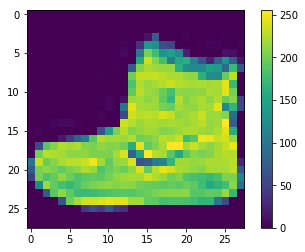

In [32]:
# 绘图展示
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


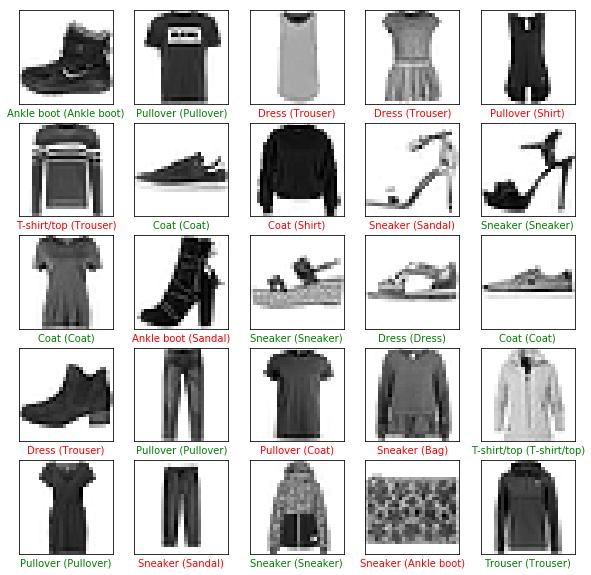

In [36]:
# 展示25张图片及其分类标签
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(u'off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = u'green'
    else:
        color = u'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
plt.show()

In [37]:
# 对单个图片预测
img = test_images[0]
print(img.shape)

(28, 28)


In [38]:
# tf.keras模型经过优化，可以同时对一组示例进行预测或集合。因此，即使我们使用单个图像，我们也需要将其添加到列表中
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [39]:
# 对该图片进行预测
predictions = model.predict(img)
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [40]:
prediction = predictions[0]
print(np.argmax(prediction))

9


In [15]:
# 对测试数据和训练数据进行处理 [归一化]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
该代码按照顺序构建了一个3层的神经网络模型
该神经网络的第一层是keras.layers.Flatten，它的作用是将输入的28 x 28 矩阵展平成一个 [1 x 784]的矩阵，也就是将图片降维，虽然这样失去了二维数据的信息的意义，但有利于神经网络数据的输入和转换。
神经网络的第二层是一个拥有128个神经元的全连接层，它的激活函数是relu函数。
神经网络的第三层是输出层，拥有10个神经元，它的激活函数是softmax函数，它将返回10个概率分数的数组，总和为1。每个节点包含一个分数，表示当前图像属于10个类别之一的概率

In [16]:
# 设置层 [初始处理] --建立神经层
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
损失函数(Loss function) - 这可以衡量模型在训练过程中的准确程度。我们希望最小化此这个函数值，以便在正确的方向上“引导”模型。
优化器 (Optimizer)- 它会根据你采用的不同种类的智能优化算法，来不断的求解损失函数的最小值。最常见的是梯度下降法，框架提供了很多种不同的优化器，需要根据问题尝试最佳的优化器
性能评估(Metrics) - 用于监控培训和测试步骤。以下示例使用精度，即正确分类的图像分数

In [19]:
# 编译模型
# 损失函数、优化器、指标
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
             loss=u'sparse_categorical_crossentropy',
             metrics=[u'accuracy'])

In [ ]:
AdamOptimizer优化器通过使用动量（参数的移动平均数）来改善传统梯度下降，促进超参数动态调整。
sparse_categorical_crossentropy 是多类对数损失函数

In [ ]:
训练模型
1.将训练数据投递给神经网络，也就是train_images和train_labels矩阵
2.神经网络学习，将标签和图片关联起来
3.将测试数据test_imges投递给神经网络，神经网络给出预测值。我们可以将神经网络的输出结果和test_labels进行比对来验证预测值是否正确

In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 2.2865 - acc: 0.1525
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 2.1259 - acc: 0.2374
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 1.9890 - acc: 0.3575
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 1.8695 - acc: 0.4488
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 1.7640 - acc: 0.5102


In [21]:
# 准确率评估[得分]
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(u'Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 18us/step
Test accuracy:  0.5293


In [22]:
# 评估完成， 对测试数据进行预测
predictions = model.predict(test_images)

In [34]:
print(predictions[0])

[0.0704469  0.05530806 0.06173988 0.05447032 0.07454831 0.15233478
 0.07552566 0.11229688 0.1106189  0.23271026]


In [24]:
# 选第一个样本预测后得出最有可能结果
print(np.argmax(predictions[0]))

9


In [25]:
# 对比结果
print(test_labels[0])

9
